In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# **1. Load Dataset**

In [3]:
#train/test/submission dataset load
train_data = pd.read_csv('/content/drive/MyDrive/데이콘/비행기/train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/데이콘/비행기/test.csv')
submission_data = pd.read_csv('/content/drive/MyDrive/데이콘/비행기/sample_submission.csv')

# **2. Introduce Features**

1. 항공편 운항 관련 정보
 - ID : 샘플 고유 id
 - Month: 해당 항공편의 출발 월
 - Day_of_Month: Month에 해당하는 월의 날짜
 - Estimated_Departure_Time: 전산 시스템을 바탕으로 측정된 비행기의 출발 시간
 (현지 시각, HH:MM 형식)
 - Estimated_Arrival_Time: 전산 시스템을 바탕으로 측정된 비행기의 도착 시간     (현지 시각, HH:MM 형식)
 - Cancelled: 해당 항공편의 취소 여부 (0: 취소되지 않음, 1: 취소됨)
 - Diverted: 해당 항공편의 경유 여부 (0: 취소되지 않음, 1: 취소됨)
 - Origin_Airport: 해당 항공편 출발 공항의 고유 코드 (IATA 공항 코드)
 - Origin_Airport_ID: 해당 항공편 출발 공항의 고유 ID (US DOT ID)
 - Origin_State: 해당 항공편 출발 공항이 위치한 주의 이름
 - Destination_Airport: 해당 항공편 도착 공항의 고유 코드 (IATA 공항 코드)
 - Destination_Airport_ID: 해당 항공편 도착 공항의 고유 ID (US DOT ID)
 - Destination_State: 해당 항공편 도착 공항이 위치한 주의 이름
 - Distance: 출발 공항과 도착 공항 사이의 거리 (mile 단위)
 - Airline: 해당 항공편을 운항하는 항공사
 - Carrier_Code(IATA): 해당 항공편을 운항하는 항공사의 고유 코드 
(IATA 공항 코드, 단 다른 항공사가 같은 코드를 보유할 수도 있음)
 - Carrier_ID(DOT): 해당 항공편을 운항하는 항공사의 고유 ID (US DOT ID)
 - Tail_Number: 해당 항공편을 운항하는 항공기의 고유 등록번호
 - Delay: 항공편 지연 여부 (Not_Delayed, Delayed) 예측해야 하는 타깃

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 19 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   ID                        1000000 non-null  object 
 1   Month                     1000000 non-null  int64  
 2   Day_of_Month              1000000 non-null  int64  
 3   Estimated_Departure_Time  890981 non-null   float64
 4   Estimated_Arrival_Time    890960 non-null   float64
 5   Cancelled                 1000000 non-null  int64  
 6   Diverted                  1000000 non-null  int64  
 7   Origin_Airport            1000000 non-null  object 
 8   Origin_Airport_ID         1000000 non-null  int64  
 9   Origin_State              890985 non-null   object 
 10  Destination_Airport       1000000 non-null  object 
 11  Destination_Airport_ID    1000000 non-null  int64  
 12  Destination_State         890921 non-null   object 
 13  Distance                  10

In [5]:
train_data.head()

,ID,Month,Day_of_Month,Estimated_Departure_Time,Estimated_Arrival_Time,Cancelled,Diverted,Origin_Airport,Origin_Airport_ID,Origin_State,Destination_Airport,Destination_Airport_ID,Destination_State,Distance,Airline,Carrier_Code(IATA),Carrier_ID(DOT),Tail_Number,Delay
0,TRAIN_000000,4,15,NaN,NaN,0,0,OKC,13851,Oklahoma,HOU,12191,Texas,419.0,Southwest Airlines Co.,WN,19393.0,N7858A,NaN
1,TRAIN_000001,8,15,740.0,1024.0,0,0,ORD,13930,Illinois,SLC,14869,Utah,1250.0,SkyWest Airlines Inc.,UA,20304.0,N125SY,NaN
2,TRAIN_000002,9,6,1610.0,1805.0,0,0,CLT,11057,North Carolina,LGA,12953,New York,544.0,American Airlines Inc.,AA,19805.0,N103US,NaN
3,TRAIN_000003,7,10,905.0,1735.0,0,0,LAX,12892,California,EWR,11618,New Jersey,2454.0,United Air Lines Inc.,UA,NaN,N595UA,NaN
4,TRAIN_000004,1,11,900.0,1019.0,0,0,SFO,14771,California,ACV,10157,California,250.0,SkyWest Airlines Inc.,UA,20304.0,N161SY,NaN


In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 18 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   ID                        1000000 non-null  object 
 1   Month                     1000000 non-null  int64  
 2   Day_of_Month              1000000 non-null  int64  
 3   Estimated_Departure_Time  891016 non-null   float64
 4   Estimated_Arrival_Time    890952 non-null   float64
 5   Cancelled                 1000000 non-null  int64  
 6   Diverted                  1000000 non-null  int64  
 7   Origin_Airport            1000000 non-null  object 
 8   Origin_Airport_ID         1000000 non-null  int64  
 9   Origin_State              893495 non-null   object 
 10  Destination_Airport       1000000 non-null  object 
 11  Destination_Airport_ID    1000000 non-null  int64  
 12  Destination_State         893477 non-null   object 
 13  Distance                  10

In [7]:
test_data.head()

,ID,Month,Day_of_Month,Estimated_Departure_Time,Estimated_Arrival_Time,Cancelled,Diverted,Origin_Airport,Origin_Airport_ID,Origin_State,Destination_Airport,Destination_Airport_ID,Destination_State,Distance,Airline,Carrier_Code(IATA),Carrier_ID(DOT),Tail_Number
0,TEST_000000,12,16,1156.0,NaN,0,0,IAH,12266,Texas,SAT,14683,Texas,191.0,United Air Lines Inc.,UA,NaN,N79402
1,TEST_000001,9,12,1500.0,1715.0,0,0,EWR,11618,New Jersey,ATL,10397,NaN,746.0,Delta Air Lines Inc.,DL,19790.0,N3765
2,TEST_000002,3,6,1600.0,1915.0,0,0,ORD,13930,Illinois,LGA,12953,New York,733.0,United Air Lines Inc.,UA,19977.0,N413UA
3,TEST_000003,5,18,1920.0,2045.0,0,0,OAK,13796,California,LAX,12892,California,337.0,Southwest Airlines Co.,WN,19393.0,N905WN
4,TEST_000004,7,7,1915.0,2152.0,0,0,FLL,11697,Florida,LAX,12892,California,2343.0,JetBlue Airways,B6,20409.0,N945JT


# **3. Visualization**

### **분석 목표**

1. Origin Airport code에서 출발한 항공편이 지연에 미치는 영향 분석
2. Destination_Airport code에 도착하는 항공편이 지연에 미치는 영향 분석
3. Distance가 지연에 미치는 영향 분석
4. Airline이 지연에 미치는 영향 분석
5. Tail number가 지연에 미치는 영향 분석

## 1번 목표

In [8]:
# origin_airport과 delay 값을 기준으로 그룹화하여 지연 횟수 계산
delay_counts_oa = train_data[train_data['Delay'].notnull()].groupby(['Origin_Airport', 'Delay']).size().reset_index(name='count')
delay_counts_oa

,Origin_Airport,Delay,count
0,ABE,Delayed,33
1,ABE,Not_Delayed,149
2,ABI,Delayed,8
3,ABI,Not_Delayed,39
4,ABQ,Delayed,142
...,...,...,...
730,YAK,Not_Delayed,28
731,YKM,Delayed,8
732,YKM,Not_Delayed,36
733,YUM,Delayed,4


In [9]:
# pivot_table을 사용하여 'Origin_Airport'열을 인덱스로, 'Delay'열을 컬럼으로 지정하고 'count'열의 값을 계산하여 피봇 테이블 생성
pivot_delay_counts_oa = pd.pivot_table(delay_counts_oa, index='Origin_Airport', columns='Delay', values='count', aggfunc='sum')
# pivot_delay_counts의 'Delay'열을 기준으로 각 행별 'delay_ratio'열 추가
pivot_delay_counts_oa['delay_ratio'] = pivot_delay_counts_oa['Delayed'] / (pivot_delay_counts_oa['Delayed'] + pivot_delay_counts_oa['Not_Delayed'])

# 리스트에 담아줌
airportlist_oa = pivot_delay_counts_oa.index.tolist()
delay_ratio_list_oa = pivot_delay_counts_oa['delay_ratio'].tolist()

In [10]:
delay_total_oa=pd.DataFrame(columns=['Origin_Airport', 'ratio'])
for j in range(len(pivot_delay_counts_oa)) :
  delay_total_oa.loc[j] = [airportlist_oa[j], delay_ratio_list_oa[j]]

In [11]:
delay_total_oa

,Origin_Airport,ratio
0,ABE,0.181319
1,ABI,0.170213
2,ABQ,0.146392
3,ABR,0.250000
4,ABY,0.062500
...,...,...
369,XNA,0.140940
370,XWA,0.428571
371,YAK,0.096774
372,YKM,0.181818


<Axes: xlabel='ratio', ylabel='Origin_Airport'>

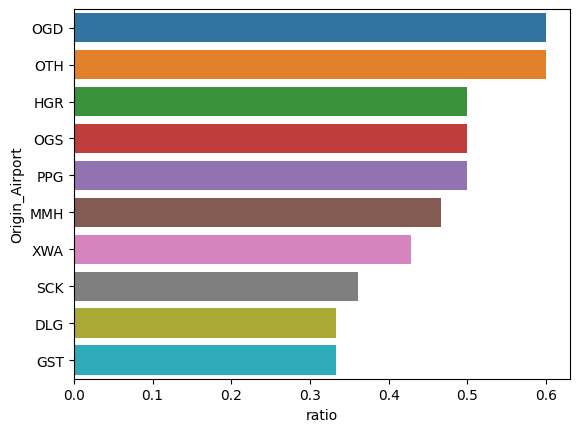

In [12]:
# 지연 횟수 Top10 시각화
top_10_oa = delay_total_oa.nlargest(10, 'ratio')
sns.barplot(x='ratio', y='Origin_Airport', data=top_10_oa)

## 2번 목표

In [13]:
# origin_airport과 delay 값을 기준으로 그룹화하여 지연 횟수 계산
delay_counts_da = train_data[train_data['Delay'].notnull()].groupby(['Destination_Airport', 'Delay']).size().reset_index(name='count')
delay_counts_da

,Destination_Airport,Delay,count
0,ABE,Delayed,31
1,ABE,Not_Delayed,158
2,ABI,Delayed,10
3,ABI,Not_Delayed,35
4,ABQ,Delayed,173
...,...,...,...
730,YAK,Not_Delayed,24
731,YKM,Delayed,3
732,YKM,Not_Delayed,34
733,YUM,Delayed,3


In [14]:
# pivot_table을 사용하여 'Destination_Airport'열을 인덱스로, 'Delay'열을 컬럼으로 지정하고 'count'열의 값을 계산하여 피봇 테이블 생성
pivot_delay_counts_da = pd.pivot_table(delay_counts_da, index='Destination_Airport', columns='Delay', values='count', aggfunc='sum')
# pivot_delay_counts의 'Delay'열을 기준으로 각 행별 'delay_ratio'열 추가
pivot_delay_counts_da['delay_ratio'] = pivot_delay_counts_da['Delayed'] / (pivot_delay_counts_da['Delayed'] + pivot_delay_counts_da['Not_Delayed'])

# 리스트에 담아줌
airportlist_da = pivot_delay_counts_da.index.tolist()
delay_ratio_list_da = pivot_delay_counts_da['delay_ratio'].tolist()

In [15]:
delay_total_da=pd.DataFrame(columns=['Destination_Airport', 'ratio'])
for j in range(len(pivot_delay_counts_da)) :
  delay_total_da.loc[j] = [airportlist_da[j], delay_ratio_list_da[j]]

In [16]:
delay_total_da

,Destination_Airport,ratio
0,ABE,0.164021
1,ABI,0.222222
2,ABQ,0.180208
3,ABR,0.047619
4,ABY,0.032258
...,...,...
368,XNA,0.182482
369,XWA,NaN
370,YAK,0.142857
371,YKM,0.081081


<Axes: xlabel='ratio', ylabel='Destination_Airport'>

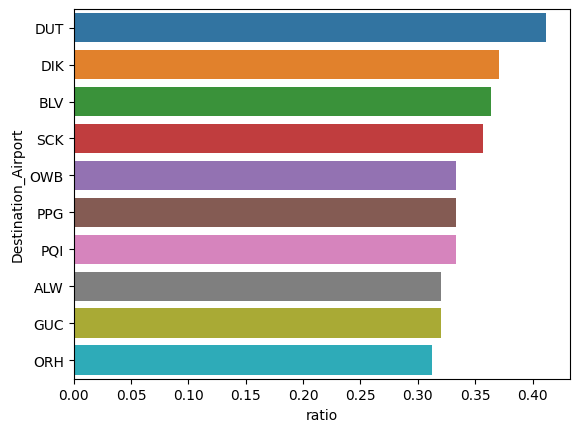

In [17]:
# 지연 횟수 Top10 시각화
top_10_da = delay_total_da.nlargest(10, 'ratio')
sns.barplot(x='ratio', y='Destination_Airport', data=top_10_da)

## 3번 목표

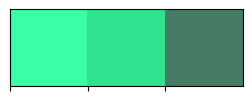

In [18]:
#팔레트 색깔
sns.palplot(['#38FFA5','#2FE290','#447D64'])
original_color=['#38FFA5','#2FE290','#447D64']

In [19]:
delay_counts_dis = train_data[train_data['Delay'].notnull()].groupby(['Distance', 'Delay']).size().reset_index(name='count')
# distance_category를 이용하여 새로운 열 추가
short_distance = 800
medium_distance = 3000
delay_counts_dis['distance_category'] = pd.cut(delay_counts_dis['Distance'], bins=[0, short_distance, medium_distance, np.inf], labels=[0, 1, 2], include_lowest=True)
delay_counts_dis

,Distance,Delay,count,distance_category
0,16.0,Not_Delayed,2,0
1,27.0,Not_Delayed,1,0
2,31.0,Delayed,2,0
3,31.0,Not_Delayed,18,0
4,41.0,Delayed,1,0
...,...,...,...,...
3058,4962.0,Not_Delayed,19,2
3059,4983.0,Delayed,4,2
3060,4983.0,Not_Delayed,20,2
3061,5095.0,Delayed,1,2


In [20]:
short_type=delay_counts_dis[delay_counts_dis['distance_category'] == 0]['count'].count()
medium_type=delay_counts_dis[delay_counts_dis['distance_category'] == 1]['count'].count()
long_type=delay_counts_dis[delay_counts_dis['distance_category'] == 2]['count'].count()
print(
    '거리가 짧은 노선인 횟수 : {}\n거리가 중간정도인 노선인 횟수 : {}\n거리가 긴 노선인 횟수 : {}'
    .format(short_type, medium_type, long_type))

거리가 짧은 노선인 횟수 : 1321
거리가 중간정도인 노선인 횟수 : 1702
거리가 긴 노선인 횟수 : 40


In [21]:
#비율로 재표현하기
delay_total_dis=pd.DataFrame()
states=['short','med', 'long']
sum = short_type + medium_type + long_type
for i,state in enumerate(states):
  if i==0:
    delay_total_dis[str(state)]=[round(short_type/sum,2)]
  elif i==1:
    delay_total_dis[str(state)]=[round(medium_type/sum,2)]
  elif i==2:
    delay_total_dis[str(state)]=[round(long_type/sum,2)]
    
delay_total_dis=delay_total_dis.transpose()[0]

In [22]:
delay_total_dis

short    0.43
med      0.56
long     0.01
Name: 0, dtype: float64

<ipython-input-23-20963c87382b>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(delay_total_dis.index, fontfamily='serif')


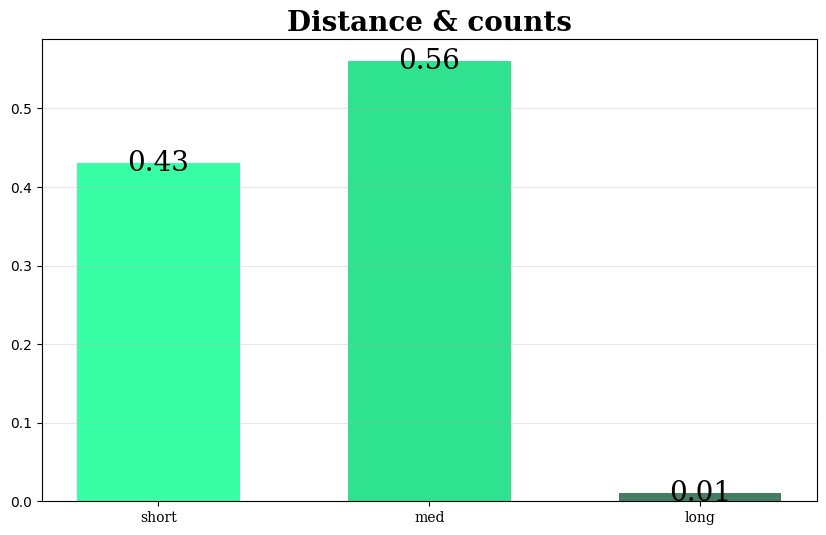

In [23]:
fig, ax = plt.subplots(1,1, figsize=(10, 6))
for i,color in enumerate(original_color):
  ax.bar(delay_total_dis.index[i], delay_total_dis[i], width=0.60, 
        color=color)

for i in delay_total_dis.index:
    ax.annotate(f"{delay_total_dis[i]}", 
                   xy=(i, delay_total_dis[i]),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',fontsize=20,
                   color='black')

ax.set_xticklabels(delay_total_dis.index, fontfamily='serif')
ax.grid(axis='y', linestyle='-', alpha=0.3)    
ax.set_title('Distance & counts',fontsize=20,fontweight='bold',fontfamily='serif')
plt.show()